# Hierarchical Clustering
Author: Nico Kuijpers  
Date: March 28, 2021

Updated by Jacco Snoeren (July 2023)

## Introduction
Hierarchical clustering is one of the machine learning algorithms that can be applied for unsupervised learning. In this notebook we give an example of how to apply agglomerative clustering on the Iris dataset.

First import the libraries we need.

In [25]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.22.3
pandas version: 1.4.2
scikit-learn version: 1.0.2
seaborn version: 0.11.2
matplotlib version: 3.5.1


# 📦 Data provisioning
To illustrate hierarchical clustering we use the Iris dataset. The dataset consists of 149 entries, 4 input features, and 1 output label. The data set consists of about 50 samples from each of three species of Iris: Iris setosa, Iris virginica, and Iris versicolor. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

During clustering, we ignore the labels (unsupervised learning). We can compare the results of clustering with the labels afterwards. 

For more information on the Iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set

In [26]:
# Download the Iris dataset from the internet
columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"]
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=columns)

## 📃 Sample the data
Get a first impression of the dataset by printing the data format and showing the first 5 rows and last 5 rows
of the DataFrame.

In [27]:
# Explore the Iris dataset
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (150, 5)


Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [28]:
df_iris.tail(5)

Sepal Length  Sepal Width  Petal Length  Petal Width         Species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

Print the different species in the dataset.

In [29]:
print(df_iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Print the number of flowers for each species and visualize these numbers using a bar plot.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


<AxesSubplot:>

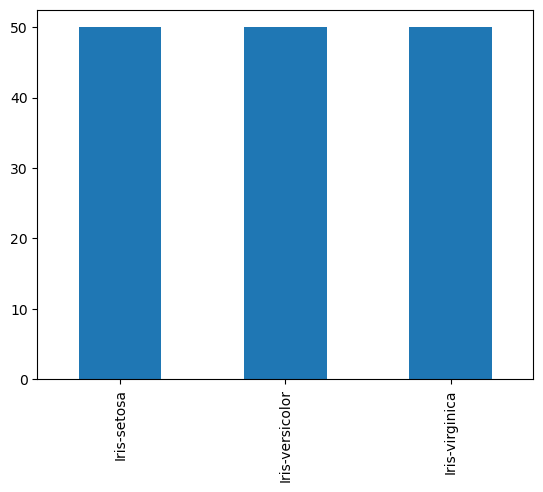

In [30]:
print(df_iris['Species'].value_counts())
df_iris['Species'].value_counts().plot(kind='bar')

# Preprocessing



Method `pandas.DataFrame.info()` prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html.

In [31]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Method `pandas.DataFrame.describe()` generates descriptive statistics. These include central tendency, dispersion,
and shape of a dataset's distribution, excluding NaN values. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [32]:
df_iris.describe()

Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Analyse the dataset using a box-and-whisker plot generated by method `pandas.DataFrame.boxplot()`. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
    
For more information on box plots, see https://en.wikipedia.org/wiki/Box_plot

From the box plot below, it can be observed that for Sepal Length and Sepal Width, 
there is some overlap in values for the three different species. Petal Length and
Petal Width show less overlap. This information may be useful when selecting features.

**Note**: by default, the box plot will be partly shown and a scroll bar appears. To view the 
entire box plot, select Cell &#8594; All Output &#8594; Toggle Scrolling.

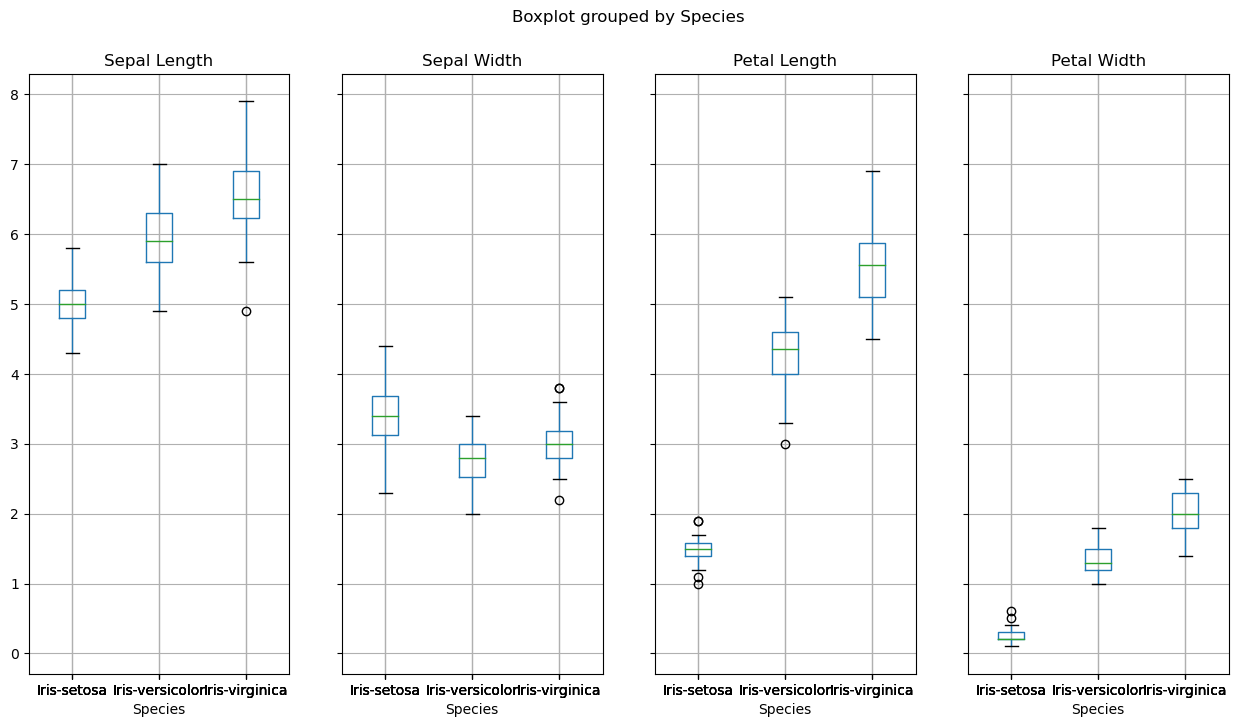

In [33]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species', figsize=(15,8), layout=(1,4));

Plot pairwise relationships using method `seaborn.pairplot`. 
See https://seaborn.pydata.org/generated/seaborn.pairplot.html

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

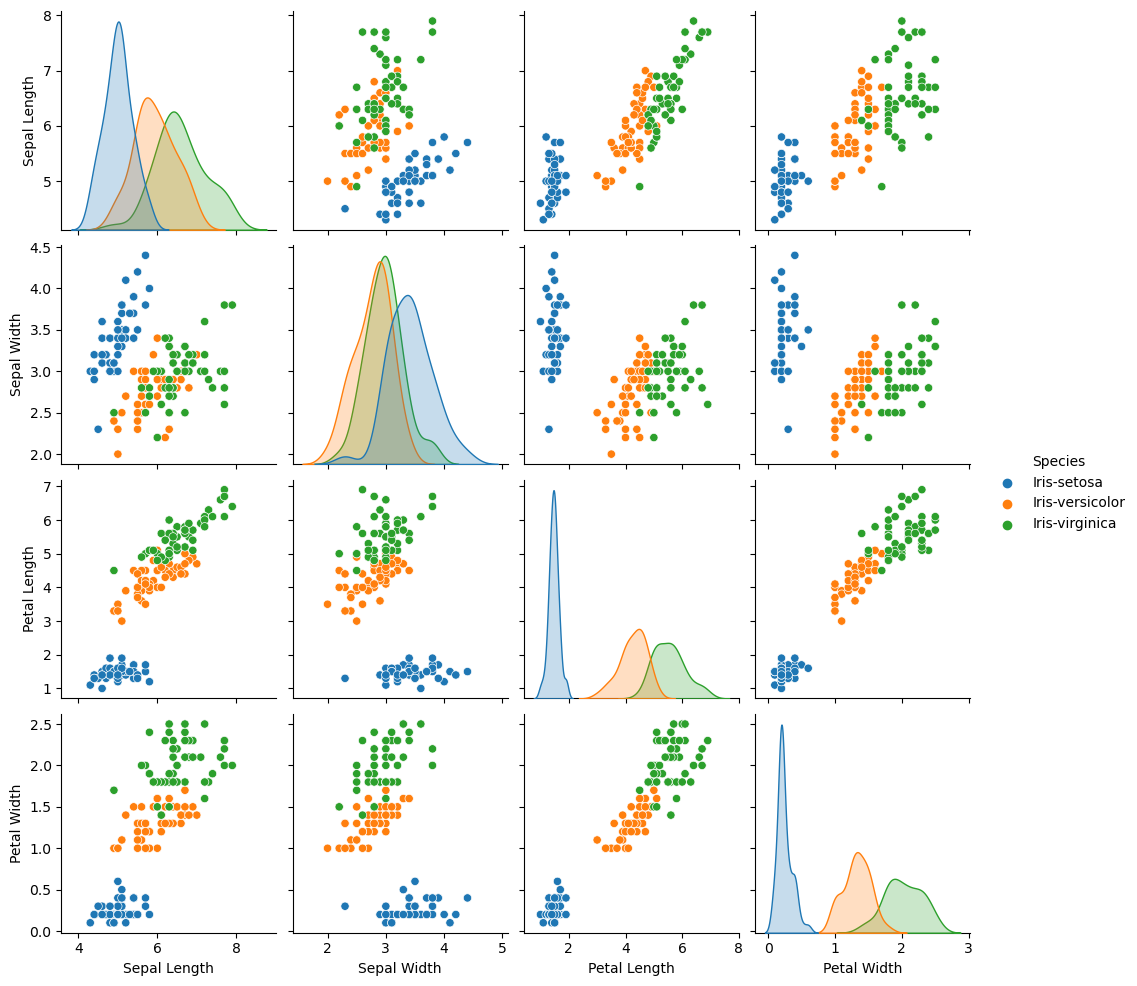

In [34]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris, hue='Species')
plt.show

## 💡 Feature selection
Use all 4 features for clustering. 
From the box plots it can be observed that the values range between 0 and 8 cm and that the distribution 
differs per feature. 
For instance, Sepal Length ranges between 4 and 8 cm, while Petal Width ranges between 0 and 3 cm. 
When applying K-means clustering it is important to normalize the data. Using the `StandardScaler`, 
the standard score of a sample $x$ is calculated as $z=(x-u)/s$, where $u$ is the mean and $s$ is 
the standard deviation.

In [35]:
from sklearn.preprocessing import StandardScaler

# Define X_iris and y_iris

# Use this line to select all four features
X_iris = df_iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]

# Use this line to select Sepal Length and Sepal Width
#X_iris = df_iris[['Sepal Length', 'Sepal Width']]

# Use this line to select Petal Length and Petal Width
#X_iris = df_iris[['Petal Length', 'Petal Width']]

# Note that we will not use y_iris during clustering
y_iris = df_iris['Species']
print('Iris types:', y_iris.unique())

# Normalize the data
scaler_iris = StandardScaler().fit(X_iris)
X_iris_normalized = scaler_iris.transform(X_iris)
print('The length of X_iris_normalized: ', len(X_iris))


Iris types: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The length of X_iris_normalized:  150


Visualize the distribution of the data per feature after normalization.

Number of selected features:  4


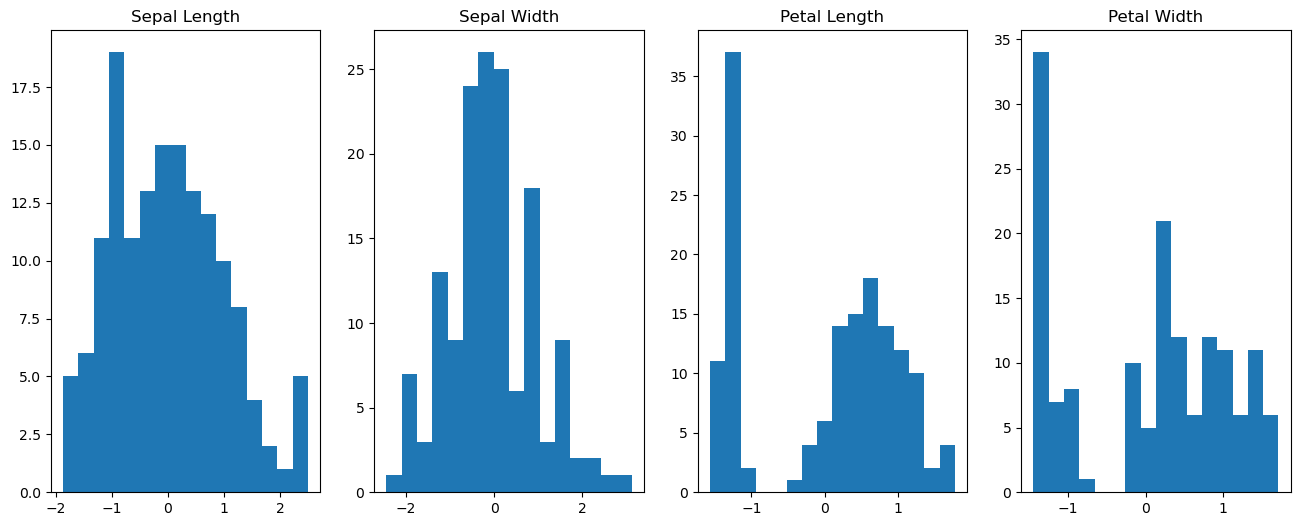

In [36]:
# Define number of bins for histogram
nbins = 16

# Number of selected features
nfeatures = len(X_iris.columns)
print('Number of selected features: ',nfeatures)

# Plot histograms for each of the selected features
fig, axs = plt.subplots(1,nfeatures,figsize=(nfeatures*4,6))
for feature in range(nfeatures):
    axs[feature].hist(X_iris_normalized[:,feature],nbins)
    axs[feature].set_title(X_iris.columns[feature])

## 🪓 Splitting into train/test

It's important here to realize that we do not split the data into train and test data. Clustering is (primarily) unsupervised, so we do not split the data into train and test.

# Modelling
To perform hierarchical clustering, we use `sklearn.cluster.AgglomerativeClustering`. 

See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [37]:
from sklearn.cluster import AgglomerativeClustering

# Define number of clusters by setting distance threshold
agglom = AgglomerativeClustering(distance_threshold=10, n_clusters=None)

# Use this line for agglomerative clustering using normalized data
agglom.fit(X_iris_normalized)

# Use this line for agglomerative clustering with original data (not normalized)
#agglom.fit(X_iris)

AgglomerativeClustering(distance_threshold=10, n_clusters=None)

Number of clusters found by the algorithm. If parameter `distance_threshold=None`, it will
be equal to the given `n_clusters`.

In [38]:
print('Number of clusters: ',agglom.n_clusters_)

Number of clusters:  3


Cluster labels are stored in an ndarray of shape (n_samples).

In [39]:
print(np.unique(agglom.labels_))

[0 1 2]


Number of leaves in the hierarchical tree.

In [40]:
print(agglom.n_leaves_)

150


In [41]:
print(agglom.distances_)

[ 0.          0.          0.          0.12116787  0.12116787  0.13147297
  0.13147297  0.13384828  0.13384828  0.14324402  0.14324402  0.16618209
  0.16618209  0.17059711  0.17218845  0.17844174  0.18761797  0.21190004
  0.21190004  0.21190004  0.21537994  0.21990127  0.22746282  0.22746282
  0.22978415  0.23828773  0.24233574  0.24233574  0.24351124  0.25784136
  0.26120679  0.26120679  0.26294594  0.26644423  0.26732507  0.26732507
  0.26932296  0.27515097  0.28644727  0.28648805  0.28942582  0.29505242
  0.29790575  0.30375084  0.31376577  0.31376577  0.31376577  0.31376577
  0.31511662  0.32353155  0.33986417  0.34070579  0.34600939  0.3460313
  0.37358977  0.37358977  0.38442376  0.39092625  0.39209045  0.39264009
  0.3961951   0.40473771  0.40578926  0.41503138  0.41920979  0.42799855
  0.43128204  0.43588059  0.45409367  0.46036989  0.46095366  0.46699925
  0.46713195  0.4674069   0.47442436  0.47697625  0.4845692   0.4846567
  0.48573247  0.49421792  0.50071517  0.51025165  0.5

(array([110.,  22.,   6.,   2.,   5.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.90657399,  1.81314798,  2.71972197,  3.62629596,
         4.53286996,  5.43944395,  6.34601794,  7.25259193,  8.15916592,
         9.06573991,  9.9723139 , 10.87888789, 11.78546188, 12.69203587,
        13.59860987, 14.50518386, 15.41175785, 16.31833184, 17.22490583,
        18.13147982, 19.03805381, 19.9446278 , 20.85120179, 21.75777579,
        22.66434978, 23.57092377, 24.47749776, 25.38407175, 26.29064574,
        27.19721973]),
 <BarContainer object of 30 artists>)

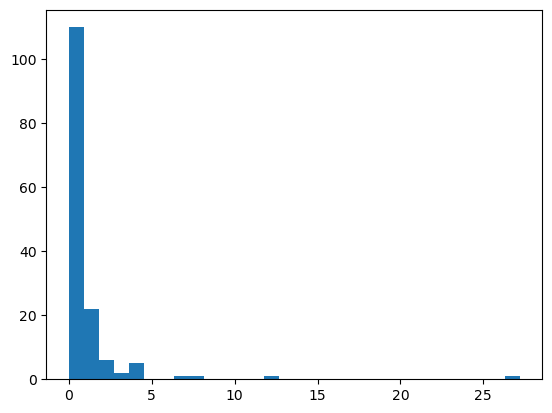

In [42]:
plt.hist(agglom.distances_,30)

Plot hierarchical clustering dendrogram.

The code below is adapted from
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

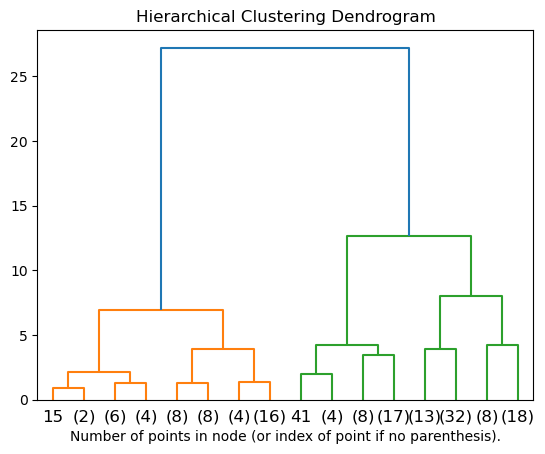

In [43]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agglom, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Inference
For each datapaint, add the cluster to the original Iris data set.

In [44]:
df_iris['Cluster'] = agglom.labels_.astype(str)
df_iris['Cluster'] = 'Cluster ' + df_iris['Cluster']
df_iris.head(5)

Sepal Length  Sepal Width  Petal Length  Petal Width      Species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

     Cluster  
0  Cluster 1  
1  Cluster 1  
2  Cluster 1  
3  Cluster 1  
4  Cluster 1

In [45]:
df_iris.tail(5)

Sepal Length  Sepal Width  Petal Length  Petal Width         Species  \
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

       Cluster  
145  Cluster 0  
146  Cluster 0  
147  Cluster 0  
148  Cluster 0  
149  Cluster 0

Plot pairwise relationships per species and per cluster using method `seaborn.pairplot`. 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

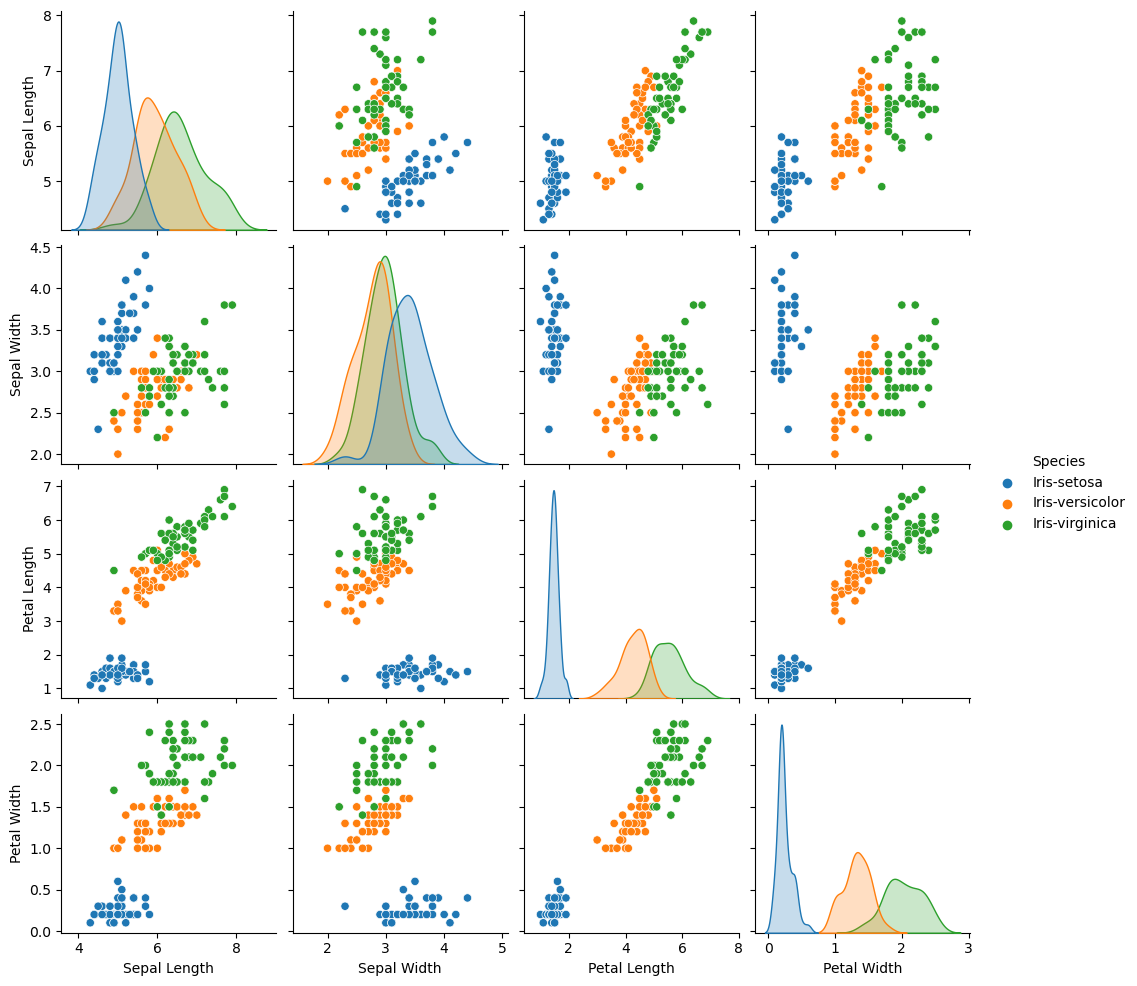

<Figure size 800x800 with 0 Axes>

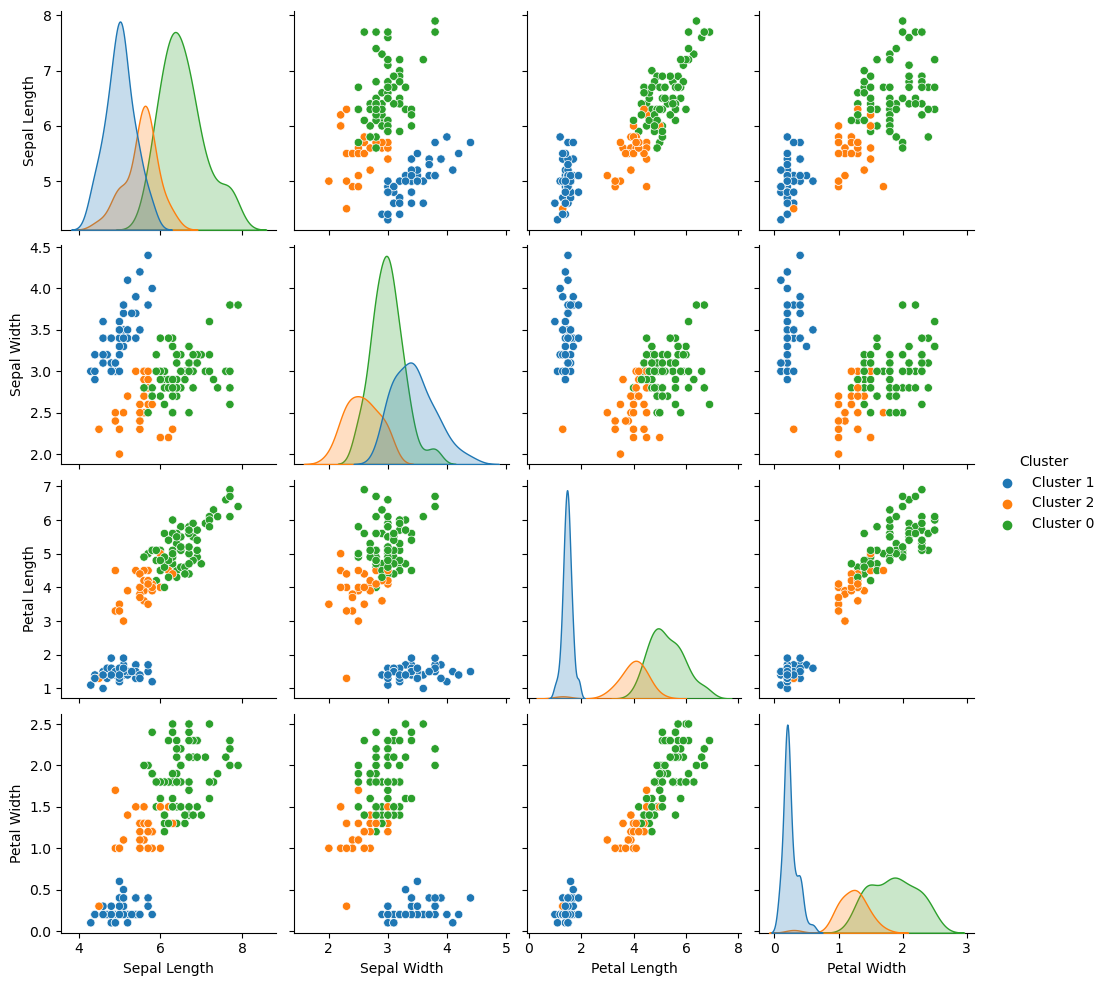

In [46]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Species"]], hue="Species")
plt.show

plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Cluster"]], hue="Cluster")
plt.show

# Evaluation
If clustering is successful, one may expect that flowers of the same species end up in the same cluster.
Let us check whether this is the case.

Code for the bar plot is adapted from
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

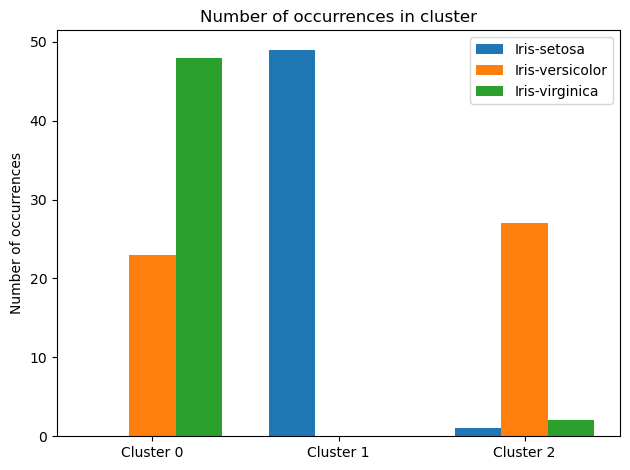

In [47]:
# Define labels for species
species = df_iris['Species'].unique()

# Define labels for clusters
clusters = df_iris['Cluster'].unique()

# Sort cluster names in alphabetical order, i.e.,
# Cluster 0, Cluster 1, Cluster 2, etc.
clusters.sort()

# Determine the location for cluster labels 
x = np.arange(len(clusters))

# Define the width of the bars
width = 0.25

# Create the bar plot
fig, ax = plt.subplots()
offset = -width
for spec in species:
    nr_occurrences = []
    for clus in clusters:
        nr = df_iris[(df_iris['Species']==spec) & (df_iris['Cluster']==clus)]['Cluster'].count()
        nr_occurrences.append(nr)
    rects = ax.bar(x + offset, nr_occurrences, width, label=spec)
    offset = offset + width

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of occurrences in cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

fig.tight_layout()
plt.show()

In [48]:
print(df_iris['Species'].value_counts())
print(df_iris['Cluster'].value_counts())

species = df_iris['Species'].unique()
for spec in species:
    print('Number of samples per cluster for',spec)
    print(df_iris[df_iris['Species']==spec]['Cluster'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
Cluster 0    71
Cluster 1    49
Cluster 2    30
Name: Cluster, dtype: int64
Number of samples per cluster for Iris-setosa
Cluster 1    49
Cluster 2     1
Name: Cluster, dtype: int64
Number of samples per cluster for Iris-versicolor
Cluster 2    27
Cluster 0    23
Name: Cluster, dtype: int64
Number of samples per cluster for Iris-virginica
Cluster 0    48
Cluster 2     2
Name: Cluster, dtype: int64
